# Analysis

In [2]:
import pandas as pd
import numpy as np


In [55]:
results_df = pd.read_csv("results_ours_all_with_None.csv")
results_df

,Dataset Name,Path Type,Acceleration Type,Path Direction,Path Number,Sample Rate,Prediction Horizon,Prediction Model,Angular Avg. Window,Linear Avg. Window,Average ADE,Average ADE (Normalized),Average FDE,Average FDE (Normalized)
0,VL_C_F_TD_3,VL_C,F,TD,3,2.5hz,12,CTRV,8.0,8,NaN,NaN,NaN,NaN
1,VL_C_F_TD_3,VL_C,F,TD,3,full,12,CTRV,8.0,8,29.6,14.8,51.3,0.9
2,VL_C_F_TD_3,VL_C,F,TD,3,10hz,12,CTRV,8.0,8,43.7,8.8,121.6,0.9
3,VL_C_F_BU_5,VL_C,F,BU,5,2.5hz,12,CTRV,8.0,8,NaN,NaN,NaN,NaN
4,VL_C_F_BU_5,VL_C,F,BU,5,full,12,CTRV,8.0,8,32.3,7.9,53.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,CP_C_F_CCW_3,CP_C,F,CCW,3,full,12,CV,NaN,8,21.7,5.8,36.1,0.6
608,CP_C_F_CCW_3,CP_C,F,CCW,3,10hz,12,CV,NaN,8,74.0,11.1,153.9,1.1
609,CP_C_A_CW_1,CP_C,A,CW,1,2.5hz,12,CV,NaN,8,NaN,NaN,NaN,NaN
610,CP_C_A_CW_1,CP_C,A,CW,1,full,12,CV,NaN,8,24.4,6.5,42.1,0.6


In [57]:
results_df_filtered = results_df.copy()

results_df_filtered = results_df_filtered[
    # (results_df['Dataset Name'].isin(['IL_C_A_RCCW_1'])) & 
    # (results_df['Prediction Horizon'] == 12) &
    (results_df['Sample Rate'] == '2.5hz') &
    # (results_df['Angular Avg. Window'] == 8) & 
    (results_df['Linear Avg. Window'] == 8) &
    (results_df['Prediction Model'] == 'CTRV')
    # (results_df['Path Type'] == 'DL_C')
    ]

# # Same path type for all straight lines
results_df_filtered.loc[results_df_filtered['Path Type'].isin(['VL_C', 'HL_C', 'DL_C']), 'Path Type'] = 'Straight'
results_df_filtered.loc[results_df_filtered['Sample Rate'].isin(['2.5hz']), 'Sample Rate'] = 2.5
results_df_filtered.loc[results_df_filtered['Sample Rate'].isin(['10hz']), 'Sample Rate'] = 10
results_df_filtered.loc[results_df_filtered['Sample Rate'].isin(['full']), 'Sample Rate'] = 25

results_df_filtered

pd.options.display.float_format = '{:.1f}'.format

results_df_filtered.groupby([
    # 'Dataset Name',
    'Path Type',
    # 'Sample Rate',
    'Prediction Horizon',
    # 'Angular Avg. Window',
    # 'Linear Avg. Window',
    # 'Prediction Model'
]).agg({
    'Average ADE': ['mean'],
    'Average FDE': ['mean'],
    # 'Average FDE (Normalized)': ['mean', 'std'],
    
    'Dataset Name': 'size'
}).reset_index()

,Path Type,Prediction Horizon,Average ADE,Average FDE,Dataset Name
,,,mean,mean,size
0,CP_C,12,238.9,351.3,13
1,IL_C,12,129.0,188.2,19
2,SP_C,12,147.1,246.2,16
3,Straight,12,47.6,NaN,54


In [47]:
results_df_filtered = results_df.copy()

results_df_filtered = results_df_filtered[
    # (results_df['Dataset Name'].isin(['IL_C_A_RCCW_1'])) & 
    (results_df['Prediction Horizon'] == 12) &
    # (results_df['Sample Rate'] == '2.5hz') &
    ((results_df['Angular Avg. Window'] == 8) | (results_df['Angular Avg. Window'].isna())) &
    (results_df['Linear Avg. Window'] == 8) &
    (results_df['Prediction Model'] == 'CV')
    # (results_df['Path Type'] == 'IL_C')
    ]

# # Same path type for all straight lines
results_df_filtered.loc[results_df_filtered['Path Type'].isin(['VL_C', 'HL_C', 'DL_C']), 'Path Type'] = 'Straight'
results_df_filtered.loc[results_df_filtered['Sample Rate'].isin(['2.5hz']), 'Sample Rate'] = 2.5
results_df_filtered.loc[results_df_filtered['Sample Rate'].isin(['10hz']), 'Sample Rate'] = 10
results_df_filtered.loc[results_df_filtered['Sample Rate'].isin(['full']), 'Sample Rate'] = 25

# results_df_filtered = results_df_filtered.dropna()

results_df_filtered

pd.options.display.float_format = '{:.2f}'.format

results_df_filtered.groupby([
    # 'Dataset Name',
    'Path Type',
    # 'Acceleration Type',
    # 'Sample Rate',
    # 'Prediction Horizon',
    # 'Angular Avg. Window',
    # 'Linear Avg. Window',
    # 'Prediction Model'
]).agg({
    'Average ADE': 'mean',
    # 'Average ADE (Normalized)': ['mean', 'std'],
    'Average FDE': ['mean'],
    # 'Average FDE (Normalized)': ['mean', 'std'],
    'Dataset Name': 'size'
}).reset_index()


,Path Type,Average ADE,Average FDE,Dataset Name
,,mean,mean,size
0,CP_C,89.49,159.98,39
1,IL_C,110.09,186.58,57
2,SP_C,101.28,201.39,48
3,Straight,29.72,55.04,162


In [93]:
results_df_filtered = results_df_filtered[
    # (results_df['Dataset Name'].isin(['DL_C_F_BRTL_4'])) & 
    (results_df_filtered['Prediction Horizon'] == 4) &
    (results_df_filtered['Sample Rate'] == 10)
    # (results_df['Prediction Horizon'] == 4) &
    # (results_df['Acceleration Type'] == 'F') &
    # (results_df['Prediction Model'] == 'CV') &
    # (results_df['Path Type'] == 'DL_C')
    ]

results_df_filtered
# results_df_grouped = results_df_filtered.groupby([
#     # 'Dataset Name',
#     'Path Type',
#     'Acceleration Type',
#     'Sample Rate',
#     'Prediction Horizon',
#     # 'Angular Avg. Window',
#     'Linear Avg. Window',
#     'Prediction Model'
# ]).agg({
#     'Average FDE': 'mean',
#     'Average FDE (Normalized)': 'mean',
#     'Average ADE': 'mean',
#     'Average ADE (Normalized)': 'mean',
#     'Dataset Name': 'size'
# }).reset_index()

# results_df_grouped

,Dataset Name,Path Type,Acceleration Type,Path Direction,Path Number,Sample Rate,Prediction Horizon,Prediction Model,Angular Avg. Window,Linear Avg. Window,Average ADE,Average ADE (Normalized),Average FDE,Average FDE (Normalized)


Each path type with each model:


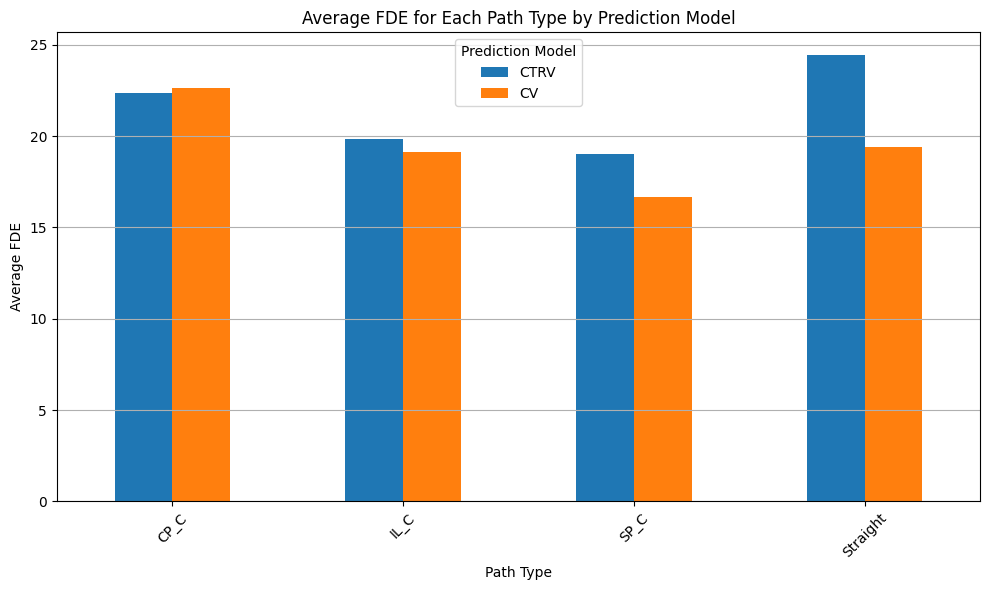

In [54]:
print('Each path type with each model:')
# table_1 = results_df_grouped[
#     (results_df['Prediction Horizon'] == 4) &
#     (results_df['Acceleration Type'] == 'F')
#     # (results_df['Prediction Model'] == 'CV') &
#     # (results_df['Path Type'] == 'DL_C')
#     ]

results_df_grouped.groupby([
    # 'Dataset Name',
    'Path Type',
    # 'Sample Rate',
    # 'Prediction Horizon',
    # 'Angular Avg. Window',
    # 'Linear Avg. Window',
    'Prediction Model'
]).agg({
    'Average FDE': ['mean', 'std'],
    # 'Average FDE (Normalized)': ['mean', 'std'],
    'Average ADE': ['mean', 'std'],
    # 'Average ADE (Normalized)': ['mean', 'std'],
    'Dataset Name': 'size'
}).reset_index()


import matplotlib.pyplot as plt 
import seaborn as sns
# Pivot the data to create a table with Path Type as rows and Prediction Models as columns
pivot_table = results_df_grouped.pivot_table(
    index='Path Type',
    columns='Prediction Model',
    values='Average FDE',
    aggfunc='mean'
)

# Convert the pivot table to a bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average FDE for Each Path Type by Prediction Model')
plt.ylabel('Average FDE')
plt.xlabel('Path Type')
plt.xticks(rotation=45)
plt.legend(title='Prediction Model')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Each path type with each frequency:


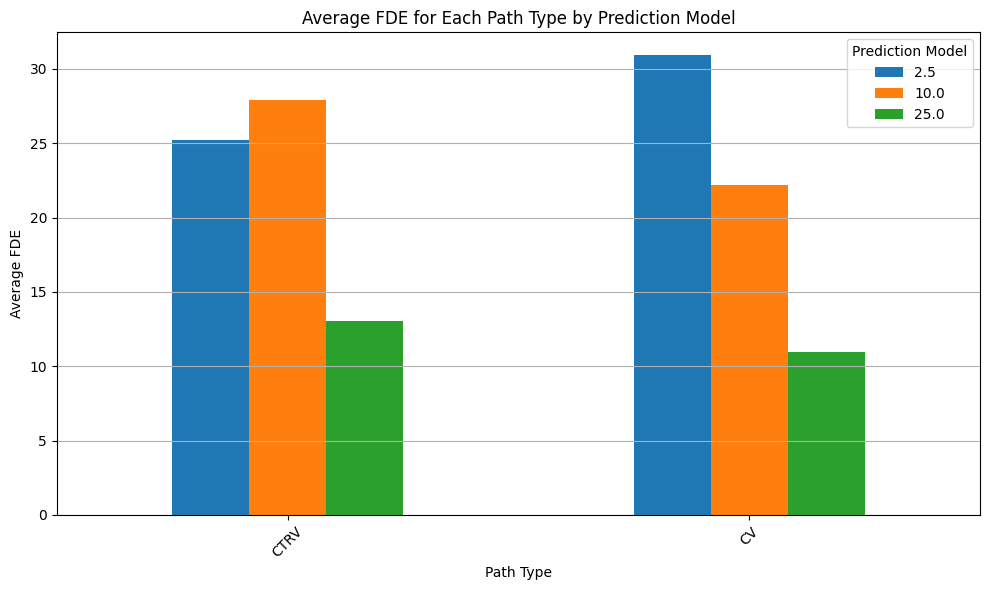

In [84]:
print('Each path type with each frequency:')
# table_1 = results_df_grouped[
#     (results_df['Prediction Horizon'] == 4) &
#     (results_df['Acceleration Type'] == 'F')
#     # (results_df['Prediction Model'] == 'CV') &
#     # (results_df['Path Type'] == 'DL_C')
#     ]

results_df_grouped.groupby([
    # 'Dataset Name',
    # 'Path Type',
    'Sample Rate',
    # 'Prediction Horizon',
    # 'Angular Avg. Window',
    # 'Linear Avg. Window',
    'Prediction Model'
]).agg({
    'Average FDE': ['mean', 'std'],
    # 'Average FDE (Normalized)': ['mean', 'std'],
    'Average ADE': ['mean', 'std'],
    # 'Average ADE (Normalized)': ['mean', 'std'],
    'Dataset Name': 'size'
}).reset_index()

import matplotlib.pyplot as plt 
import seaborn as sns
# Pivot the data to create a table with Path Type as rows and Prediction Models as columns
pivot_table = results_df_grouped.pivot_table(
    index='Prediction Model',
    columns='Sample Rate',
    values='Average FDE',
    aggfunc='mean'
)

# Convert the pivot table to a bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average FDE for Each Path Type by Prediction Model')
plt.ylabel('Average FDE')
plt.xlabel('Path Type')
plt.xticks(rotation=45)
plt.legend(title='Prediction Model')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Each path type with each frequency:


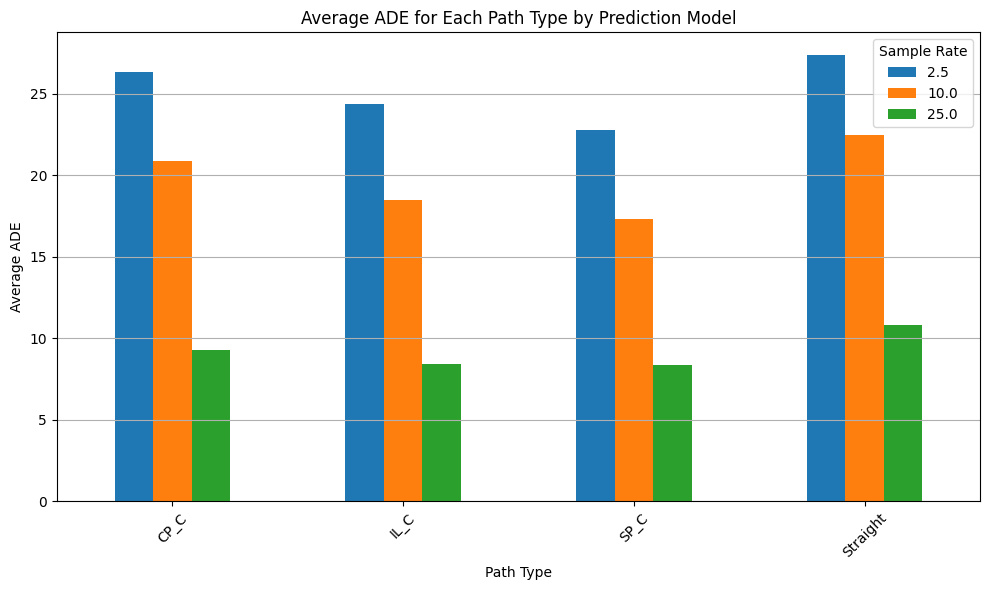

In [79]:
print('Each path type with each frequency:')
# table_1 = results_df_grouped[
#     (results_df['Prediction Horizon'] == 4) &
#     (results_df['Acceleration Type'] == 'F')
#     # (results_df['Prediction Model'] == 'CV') &
#     # (results_df['Path Type'] == 'DL_C')
#     ]

results_df_grouped.groupby([
    # 'Dataset Name',
    'Path Type',
    'Sample Rate',
    # 'Prediction Horizon',
    # 'Angular Avg. Window',
    # 'Linear Avg. Window',
    # 'Prediction Model'
]).agg({
    'Average FDE': ['mean', 'std'],
    # 'Average FDE (Normalized)': ['mean', 'std'],
    'Average ADE': ['mean', 'std'],
    # 'Average ADE (Normalized)': ['mean', 'std'],
    'Dataset Name': 'size'
}).reset_index()

import matplotlib.pyplot as plt 
import seaborn as sns
# Pivot the data to create a table with Path Type as rows and Prediction Models as columns
pivot_table = results_df_grouped.pivot_table(
    index='Path Type',
    columns='Sample Rate',
    values='Average ADE',
    aggfunc='mean'
)

# Convert the pivot table to a bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average ADE for Each Path Type by Prediction Model')
plt.ylabel('Average ADE')
plt.xlabel('Path Type')
plt.xticks(rotation=45)
plt.legend(title='Sample Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Each path type with each frequency:


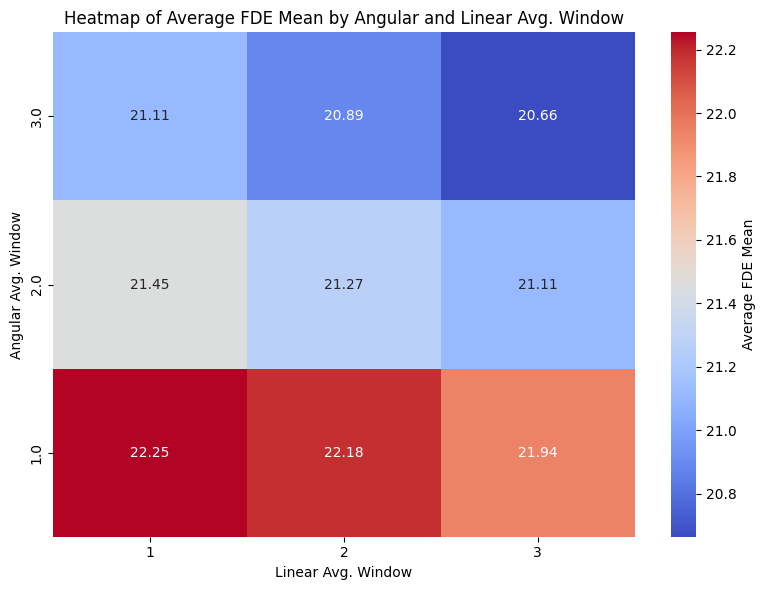

In [78]:
print('Each path type with each frequency:')


results_df_grouped = results_df_filtered.groupby([
    # 'Dataset Name',
    'Path Type',
    'Acceleration Type',
    'Sample Rate',
    'Prediction Horizon',
    'Angular Avg. Window',
    'Linear Avg. Window',
    'Prediction Model'
]).agg({
    'Average FDE': 'mean',
    'Average FDE (Normalized)': 'mean',
    'Average ADE': 'mean',
    'Average ADE (Normalized)': 'mean',
    'Dataset Name': 'size'
}).reset_index()

# results_df_grouped


results_df_grouped.groupby([
    # 'Dataset Name',
    # 'Path Type',
    # 'Sample Rate',
    # 'Prediction Horizon',
    'Angular Avg. Window',
    'Linear Avg. Window',
    # 'Prediction Model'
]).agg({
    'Average FDE': ['mean', 'std'],
    # 'Average FDE (Normalized)': ['mean', 'std'],
    'Average ADE': ['mean', 'std'],
    # 'Average ADE (Normalized)': ['mean', 'std'],
    'Dataset Name': 'size'
}).reset_index()

# Create a pivot table for the heatmap
heatmap_data = results_df_grouped.pivot_table(
    index='Angular Avg. Window',
    columns='Linear Avg. Window',
    values='Average FDE',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average FDE Mean'})
plt.title('Heatmap of Average FDE Mean by Angular and Linear Avg. Window')
plt.xlabel('Linear Avg. Window')
plt.ylabel('Angular Avg. Window')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
# import matplotlib.pyplot as plt 
# import seaborn as sns
# # Pivot the data to create a table with Path Type as rows and Prediction Models as columns
# pivot_table = results_df_grouped.pivot_table(
#     index='Path Type',
#     columns='Sample Rate',
#     values='Average ADE',
#     aggfunc='mean'
# )

# # Convert the pivot table to a bar chart
# pivot_table.plot(kind='bar', figsize=(10, 6))
# plt.title('Average ADE for Each Path Type by Prediction Model')
# plt.ylabel('Average ADE')
# plt.xlabel('Path Type')
# plt.xticks(rotation=45)
# plt.legend(title='Prediction Model')
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

Each path type with each frequency:


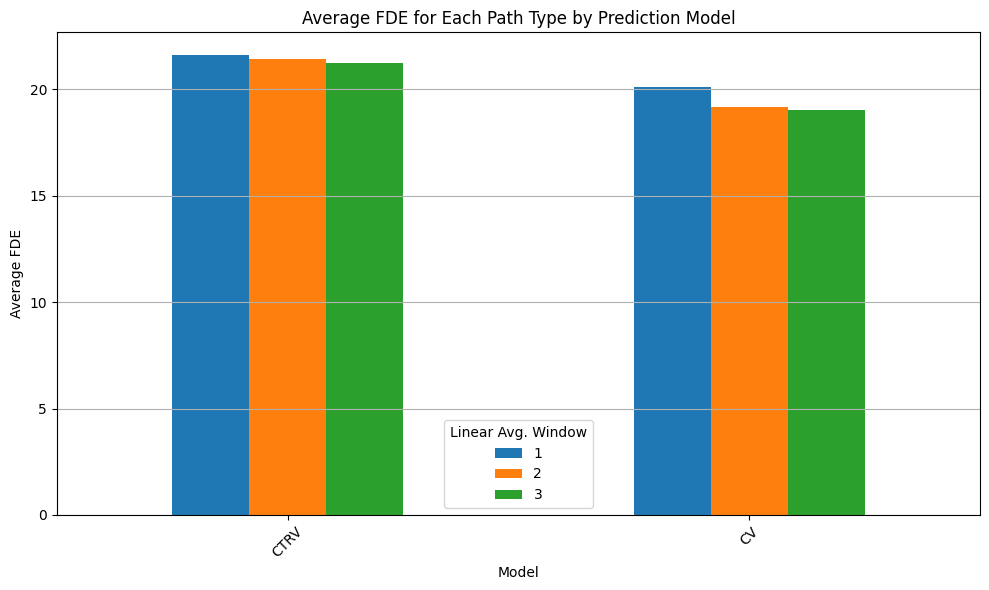

In [75]:
print('Each path type with each frequency:')


results_df_grouped = results_df_filtered.groupby([
    # 'Dataset Name',
    'Path Type',
    'Acceleration Type',
    'Sample Rate',
    'Prediction Horizon',
    # 'Angular Avg. Window',
    'Linear Avg. Window',
    'Prediction Model'
]).agg({
    'Average FDE': 'mean',
    'Average FDE (Normalized)': 'mean',
    'Average ADE': 'mean',
    'Average ADE (Normalized)': 'mean',
    'Dataset Name': 'size'
}).reset_index()

# results_df_grouped


results_df_grouped.groupby([
    # 'Dataset Name',
    # 'Path Type',
    # 'Sample Rate',
    # 'Prediction Horizon',
    # 'Angular Avg. Window',
    'Linear Avg. Window',
    'Prediction Model'
]).agg({
    'Average FDE': ['mean', 'std'],
    # 'Average FDE (Normalized)': ['mean', 'std'],
    'Average ADE': ['mean', 'std'],
    # 'Average ADE (Normalized)': ['mean', 'std'],
    'Dataset Name': 'size'
}).reset_index()

# # Create a pivot table for the heatmap
# heatmap_data = results_df_grouped.pivot_table(
#     index='Angular Avg. Window',
#     columns='Linear Avg. Window',
#     values='Average ADE',
#     aggfunc='mean'
# )

# # Plot the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average ADE Mean'})
# plt.title('Heatmap of Average ADE Mean by Angular and Linear Avg. Window')
# plt.xlabel('Linear Avg. Window')
# plt.ylabel('Angular Avg. Window')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()
# import matplotlib.pyplot as plt 
# import seaborn as sns
# # Pivot the data to create a table with Path Type as rows and Prediction Models as columns
# pivot_table = results_df_grouped.pivot_table(
#     index='Path Type',
#     columns='Sample Rate',
#     values='Average ADE',
#     aggfunc='mean'
# )

# # Convert the pivot table to a bar chart
# pivot_table.plot(kind='bar', figsize=(10, 6))
# plt.title('Average ADE for Each Path Type by Prediction Model')
# plt.ylabel('Average ADE')
# plt.xlabel('Path Type')
# plt.xticks(rotation=45)
# plt.legend(title='Prediction Model')
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()


import matplotlib.pyplot as plt 
import seaborn as sns
# Pivot the data to create a table with Path Type as rows and Prediction Models as columns
pivot_table = results_df_grouped.pivot_table(
    index='Prediction Model',
    columns='Linear Avg. Window',
    values='Average FDE',
    aggfunc='mean'
)

# Convert the pivot table to a bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average FDE for Each Path Type by Prediction Model')
plt.ylabel('Average FDE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Linear Avg. Window')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Copy the dataframe to avoid modifying the original
df_encoded = results_df_grouped.copy()

#### SEPARATE FOR EACH TYPE OF PATH, FOR EACH PRED HORIZON

# Encode categorical variables using label encoding
categorical_columns = ['Path Type', 'Acceleration Type', 'Prediction Model']

for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

Correlation with average_error and average_error_normal:
                          Average ADE  Average FDE
Prediction Horizon           0.347186     0.650248
Average ADE (Normalized)     0.215306     0.535336
Dataset Name                 0.044975     0.050115
Path Type                    0.043975     0.043603
Linear Avg. Window          -0.007360    -0.010830
Angular Avg. Window         -0.038385    -0.036537
Acceleration Type           -0.098540    -0.075440
Sample Rate                 -0.702873    -0.448052
Average FDE (Normalized)    -0.556044    -0.554075
Prediction Model                  NaN          NaN


In [ ]:
# results_df_filtered = results_df_filtered[
#     (results_df['Dataset Name'].isin(['DL_C_F_BRTL_4'])) & 
#     (results_df['Prediction Horizon'] == 4) &
#     (results_df['Acceleration Type'] == 'F') &
#     (results_df['Prediction Model'] == 'CV') &
#     (results_df['Path Type'] == 'DL_C')
#     ]

# Compute the correlation matrix
correlation_matrix = df_encoded.corr(numeric_only=True)

# Extract only the correlations with the target variables
target_corr = correlation_matrix[['Average ADE', 'Average FDE']].drop(['Average ADE', 'Average FDE'])

# Display correlation with average_error and average_error_normal
print("Correlation with average_error and average_error_normal:")
print(target_corr.sort_values(by='Average FDE', ascending=False))
# correlation_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Parameters with Error Metrics")
plt.show()


In [ ]:
results_df_filtered = pd.read_csv("results_df_both_110425_1.csv")

results_df_filtered_1 = results_df[
    (results_df['sample_rate'].isin(['10hz'])) &
    (results_df['ph'] == 4)
    # (results_df['dataset_name'] == 'CP_C_F_CCW_2') &
    # (results_df['acceleration_type'] == 'F') &
    # (results_df['speed_avg'] == False) &
    # (results_df['path_type'] == 'CP_C')
    ]

results_df_filtered_2 = results_df[
    (results_df['sample_rate'].isin(['2.5hz'])) &
    (results_df['ph'] == 1)
    # (results_df['dataset_name'] == 'CP_C_F_CCW_2') &
    # (results_df['acceleration_type'] == 'F') &
    # (results_df['speed_avg'] == False) &
    # (results_df['path_type'] == 'CP_C')
    ]

results_df_filtered = pd.concat([results_df_filtered_1, results_df_filtered_2]).drop_duplicates(keep='last').reset_index(drop=True)

# Copy and encode again if you didn't keep df_encoded
df_encoded = results_df_filtered.copy()

# Convert categorical columns to numeric codes
categorical_columns = ['acceleration_type', 'sample_rate', 'path_type', 'speed_avg']

for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Also encode 'prediction_model' to filter more easily
df_encoded['prediction_model'] = df_encoded['prediction_model'].astype(str)

# Filter for each model
ctrv_df = df_encoded[df_encoded['prediction_model'] == 'CTRV']
cv_df = df_encoded[df_encoded['prediction_model'] == 'CV']

# List of parameters to correlate
features = ['acceleration_type', 'sample_rate', 'ph', 'speed_avg', 'path_type']

# Compute correlations
ctrv_corr = ctrv_df[features + ['average_error']].corr().loc[features, 'average_error']
cv_corr = cv_df[features + ['average_error']].corr().loc[features, 'average_error']

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'CTRV': ctrv_corr,
    'CV': cv_corr
}).sort_values(by='CTRV', ascending=False)

print("Parameter correlation with average_error (CTRV vs CV):")
print(comparison_df)


In [ ]:
comparison_df.plot(kind='bar', figsize=(10, 5))
plt.title('Comparison of Parameter Correlation with average_error (CTRV vs CV)')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
